Best MAPE: 0.8349486589431763 at epoch 11


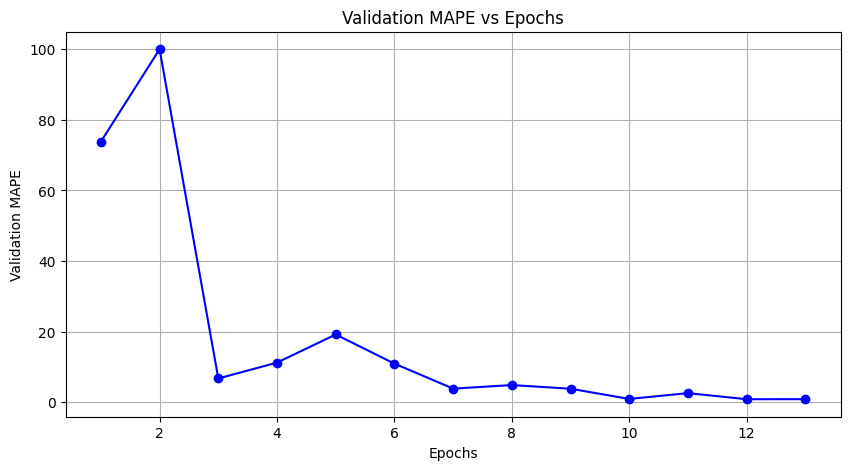

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the JSON file
with open('runs/wacv_2024_seed0/crop_yield/training_convlstm_debug/trainlog.json', 'r') as file:
    data = json.load(file)

# Extracting val_mape and epochs
epochs = list(map(int, data.keys()))
val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]
train_mape=[data[str(epoch)]['val_mape'] for epoch in epochs]

# val_mape = [(mape) for mape in val_mape]
# best_mape = min(val_mape)
# print(f'Best MAPE: {best_mape} at epoch {val_mape.index(best_mape)}')
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
plt.title('Validation MAPE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.grid(True)
plt.show()

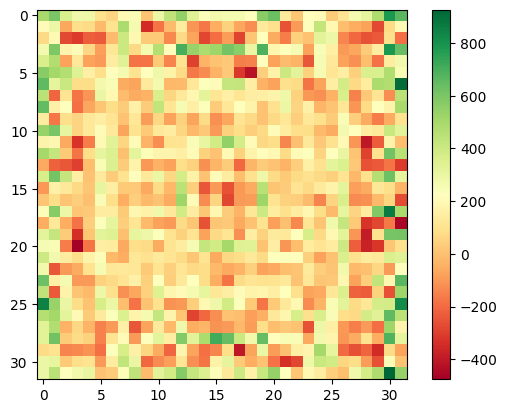

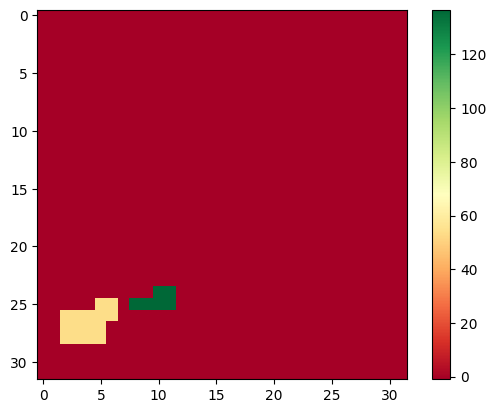

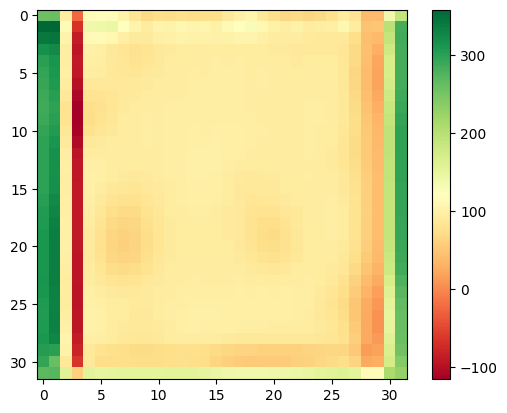

In [36]:
run = '0_9'
pred_mask = np.load(f'val_results/seed0/val/crop_yield/{run}.npy')
gt_mask = np.load(f'val_results/seed0/val/crop_yield/{run}_gt.npy')
sickle_mask = np.load(f'val_results/seed_sickle/val/crop_yield/{run}.npy')

plt.imshow(pred_mask[:, :], cmap='RdYlGn')
plt.colorbar()
plt.show()
plt.imshow(gt_mask[:, :], cmap='RdYlGn')
plt.colorbar()
plt.show()
plt.imshow(sickle_mask[:, :], cmap='RdYlGn')
plt.colorbar()
plt.show()

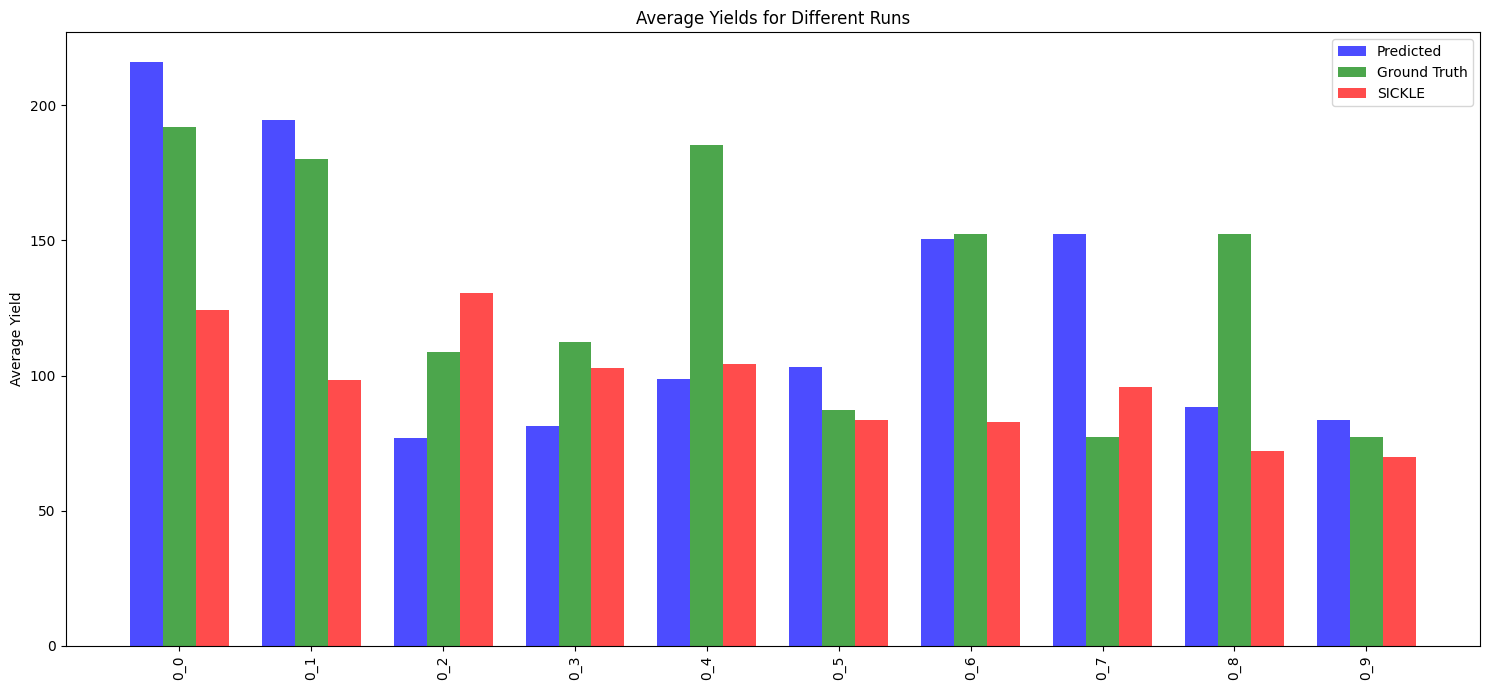

In [32]:

import matplotlib.pyplot as plt
import numpy as np

def get_averages(run):
    pred_mask = np.load(f'val_results/seed0/val/crop_yield/{run}.npy')
    gt_mask = np.load(f'val_results/seed0/val/crop_yield/{run}_gt.npy')
    sickle_mask = np.load(f'val_results/seed_sickle/val/crop_yield/{run}.npy')
    
    gt_mask[gt_mask == -1] = 0
    pred_mask[gt_mask == 0] = 0
    sickle_mask[gt_mask == 0] = 0
    # pred_mask[pred_mask < 0] = 0
    
    pred_avg = np.mean(pred_mask[pred_mask != 0])
    gt_avg = np.mean(gt_mask[gt_mask != 0])
    sickle_avg = np.mean(sickle_mask[sickle_mask != 0])
    
    return pred_avg, gt_avg, sickle_avg

runs = [f'{i}_{j}' for i in range(1) for j in range(10)]


pred_avgs, gt_avgs, sickle_avgs = zip(*[get_averages(run) for run in runs])

x = range(len(runs))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar([i - width for i in x], pred_avgs, width, label='Predicted', color='b', alpha=0.7)
ax.bar(x, gt_avgs, width, label='Ground Truth', color='g', alpha=0.7)
ax.bar([i + width for i in x], sickle_avgs, width, label='SICKLE', color='r', alpha=0.7)

ax.set_ylabel('Average Yield')
ax.set_title('Average Yields for Different Runs')
ax.set_xticks(x)
ax.set_xticklabels(runs, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


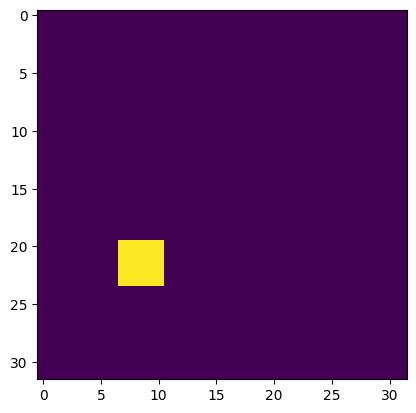

In [6]:
import matplotlib.pyplot as plt
plt.imshow(pred_mask[:, :])
plt.show()

In [16]:
# find average of all three wherevalue si not -1
print(np.mean(pred_mask[pred_mask != 0]))
print(np.mean(gt_mask[gt_mask != -0]))
print(np.mean(sickle_mask[sickle_mask != 0]))

86.912796
108.75
130.3635


In [14]:
#put 0 instead of -1
gt_mask[gt_mask == -1] = 0


In [12]:
gt_mask

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

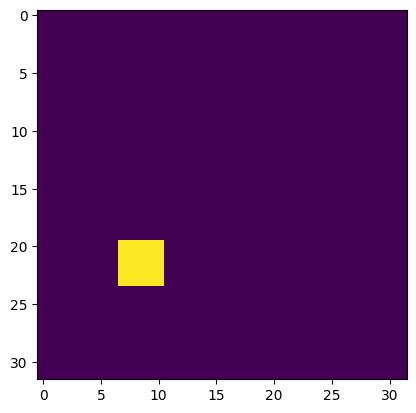

In [7]:
import matplotlib.pyplot as plt
plt.imshow(gt_mask[:, :])
plt.show()

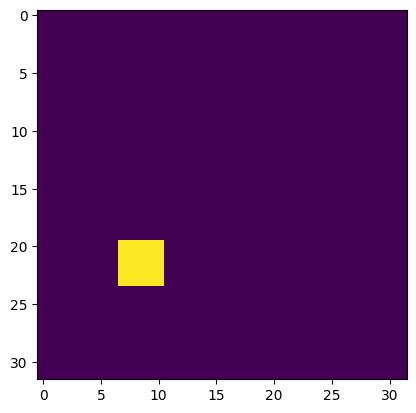

In [8]:
plt.imshow(sickle_mask[:, :])
plt.show()

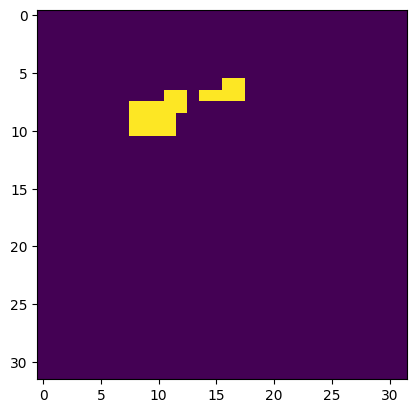

In [134]:
import matplotlib.pyplot as plt
#do 0 where less than 0
pred_mask[pred_mask < 0] = 0

plt.imshow(gt_mask[:, :])

In [1]:
values = []
valuesgt = []
sicklevalues = []
for i in range(pred_mask.shape[0]):
    for j in range(pred_mask.shape[1]):
        if gt_mask[i, j] == -1 or pred_mask <= 0:
            pred_mask[i, j] = 0
            sickle_mask[i, j] = 0
        else:
            values.append(pred_mask[i, j])
            valuesgt.append(gt_mask[i, j])
            sicklevalues.append(sickle_mask[i, j])
            
for i in range(pred_mask.shape[0]):
    for j in range(pred_mask.shape[1]):
        if gt_mask[i, j] == -1:
            continue
        else:
            pred_mask[i, j] =np.mean(values)

NameError: name 'pred_mask' is not defined

In [125]:
print(np.mean(values)) #68.57
print(np.mean(valuesgt)) #108.75
print(np.mean(sicklevalues)) #130.36

104.10883
133.33334
99.7763


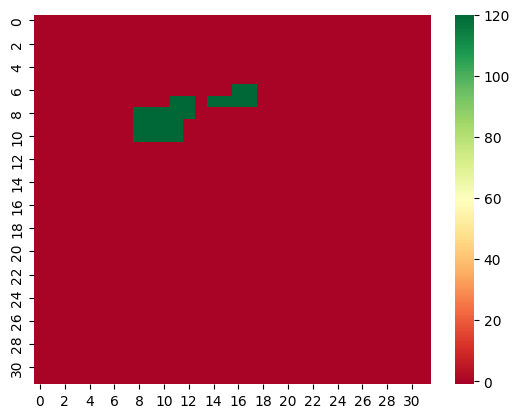

In [136]:
#with color bar for annotation
import seaborn as sns
a = sns.heatmap(pred_mask,vmin=-1, vmax=120, cmap='RdYlGn')
fig = a.get_figure()
fig.savefig('heatmap_drop.pdf')



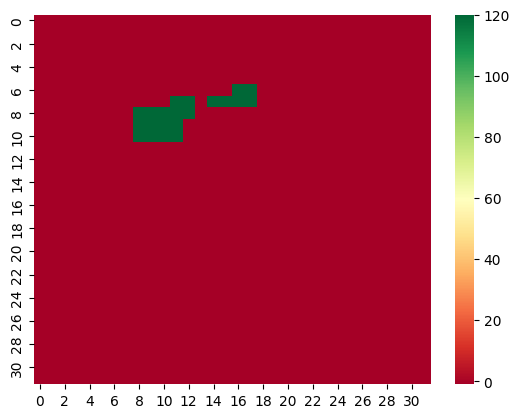

In [137]:
a = sns.heatmap(gt_mask,vmin=-1, vmax=120, cmap='RdYlGn')

fig = a.get_figure()
fig.savefig('heatmap_gt.pdf')


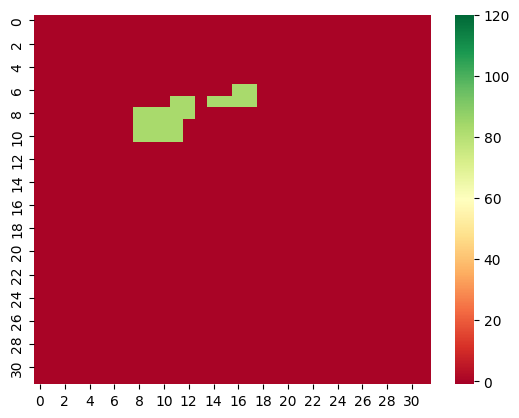

In [138]:
a = sns.heatmap(sickle_mask,vmin=-1, vmax=120, cmap='RdYlGn')
fig = a.get_figure()
fig.savefig('heatmap_sickle.pdf')

In [82]:
print(np.mean(values))

68.57883


In [4]:
# Generate random values for testing
import torch
import random

# Simulating random tensors
y_pred = torch.rand(3, 2)  # Random 10x100 tensor
y_true = torch.rand(3, 2)  # Random 10x100 tensor
pid_masks = torch.randint(0, 5, (3, 2))  # Random 10x100 tensor with integers 0-4

# Initialize temporary tensors
y_pred_temp = None
y_true_temp = None

for i in range(3):  # Simulating 10 iterations
    for pid in range(5):  # Simulating 5 unique PIDs
        if y_pred_temp is None:
            y_pred_temp = torch.sum(y_pred[i, pid_masks[i]==pid]).reshape(1)
            y_true_temp = torch.sum(y_true[i, pid_masks[i]==pid]).reshape(1)
        else:
            y_pred_temp = torch.cat((y_pred_temp, torch.sum(y_pred[i, pid_masks[i]==pid]).reshape(1)), dim=0)
            y_true_temp = torch.cat((y_true_temp, torch.sum(y_true[i, pid_masks[i]==pid]).reshape(1)), dim=0)

# Print results for verification
print("y_pred_temp:", y_pred_temp)
print("y_true_temp:", y_true_temp)

y_pred_temp: tensor([0.0000, 0.5624, 0.0000, 0.0000, 0.7268, 0.0000, 0.0000, 0.4714, 0.0000,
        0.8885, 0.2103, 0.0000, 0.0000, 0.0000, 0.7312])
y_true_temp: tensor([0.0000, 0.9785, 0.0000, 0.0000, 0.1638, 0.0000, 0.0000, 0.5889, 0.0000,
        0.5956, 0.1896, 0.0000, 0.0000, 0.0000, 0.8790])


In [6]:

y_true_temp.view(-1)

tensor([0.0000, 0.9785, 0.0000, 0.0000, 0.1638, 0.0000, 0.0000, 0.5889, 0.0000,
        0.5956, 0.1896, 0.0000, 0.0000, 0.0000, 0.8790])